### (A) : Write a program to implement cohen-sutherland clipping

Enter starting point of line (x1 y1): 5 7
Enter ending point of line (x2 y2): 9 10
Enter window coordinates (xmin ymin xmax ymax): 4 12 14 8
Line rejected


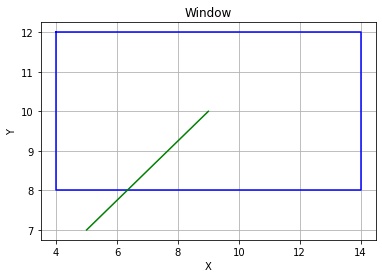

In [2]:
import matplotlib.pyplot as plt

# Defining region codes
INSIDE = 0  # 0000
LEFT = 1    # 0001
RIGHT = 2   # 0010
BOTTOM = 4  # 0100
TOP = 8     # 1000

# Function to compute region code for a point
def computeCode(x, y, xmin, ymin, xmax, ymax):
    code = INSIDE
    if x < xmin:
        code |= LEFT
    elif x > xmax:
        code |= RIGHT
    if y < ymin:
        code |= BOTTOM
    elif y > ymax:
        code |= TOP
    return code

# Cohen-Sutherland clipping algorithm
def cohenSutherland(x1, y1, x2, y2, xmin, ymin, xmax, ymax):
    code1 = computeCode(x1, y1, xmin, ymin, xmax, ymax)
    code2 = computeCode(x2, y2, xmin, ymin, xmax, ymax)
    accept = False

    while True:
        if code1 == 0 and code2 == 0:
            accept = True
            break
        elif code1 & code2 != 0:
            break
        else:
            x = 0
            y = 0
            if code1 != 0:
                code_out = code1
            else:
                code_out = code2
            
            if code_out & TOP:
                x = x1 + (x2 - x1) * (ymax - y1) / (y2 - y1)
                y = ymax
            elif code_out & BOTTOM:
                x = x1 + (x2 - x1) * (ymin - y1) / (y2 - y1)
                y = ymin
            elif code_out & RIGHT:
                y = y1 + (y2 - y1) * (xmax - x1) / (x2 - x1)
                x = xmax
            elif code_out & LEFT:
                y = y1 + (y2 - y1) * (xmin - x1) / (x2 - x1)
                x = xmin
            
            if code_out == code1:
                x1, y1 = x, y
                code1 = computeCode(x1, y1, xmin, ymin, xmax, ymax)
            else:
                x2, y2 = x, y
                code2 = computeCode(x2, y2, xmin, ymin, xmax, ymax)

    if accept:
        plt.plot([x1, x2], [y1, y2], 'r')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Cohen-Sutherland Line Clipping')
        plt.grid(True)
        plt.show()
    else:
        print("Line rejected")

# Input line coordinates and window coordinates
x1, y1 = map(int, input("Enter starting point of line (x1 y1): ").split())
x2, y2 = map(int, input("Enter ending point of line (x2 y2): ").split())
xmin, ymin, xmax, ymax = map(int, input("Enter window coordinates (xmin ymin xmax ymax): ").split())

# Plotting window
plt.plot([xmin, xmax, xmax, xmin, xmin], [ymin, ymin, ymax, ymax, ymin], 'b')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Window')
plt.grid(True)

# Plotting input line
plt.plot([x1, x2], [y1, y2], 'g', label='Original Line')

# Calling Cohen-Sutherland function
cohenSutherland(x1, y1, x2, y2, xmin, ymin, xmax, ymax)


### (B) : Write a program to implement Liang--Barsky Line clipping Algorithm


Enter starting point of line (x1 y1): 5 6
Enter ending point of line (x2 y2): 8 9
Enter window coordinates (xmin ymin xmax ymax): 6 7 9 10


UnboundLocalError: local variable 'p' referenced before assignment

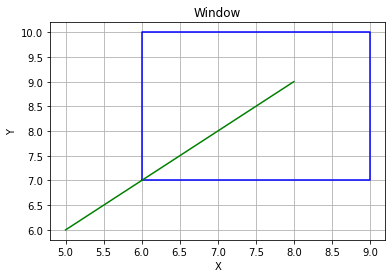

In [3]:
import matplotlib.pyplot as plt

# Define constants
LEFT = 1
RIGHT = 2
BOTTOM = 4
TOP = 8

# Function to compute values of P and Q for Liang-Barsky algorithm
def computePQ(p1, p2, p, q):
    delta = p2 - p1
    if delta == 0:
        if p1 < 0:
            p = float('inf')
            q = float('inf')
        else:
            p = -float('inf')
            q = float('inf')
    else:
        p = p / delta
        q = q / delta
    return p, q

# Function to perform Liang-Barsky clipping
def liangBarsky(x1, y1, x2, y2, xmin, ymin, xmax, ymax):
    p1 = -1 * (x2 - x1)
    p2 = x2 - x1
    p3 = -1 * (y2 - y1)
    p4 = y2 - y1
    q1 = x1 - xmin
    q2 = xmax - x1
    q3 = y1 - ymin
    q4 = ymax - y1

    p, q = computePQ(p1, p2, p, q1)
    if p > q:
        return
    p, q = computePQ(p3, p4, p, q3)
    if p > q:
        return

    if p > 0:
        if q < 1:
            p1 = p1 * q
            p2 = p2 * q
            p3 = p3 * q
            p4 = p4 * q
    else:
        if q < 1:
            p1 = p1 * q
            p2 = p2 * q
            p3 = p3 * q
            p4 = p4 * q

    x1_clip = int(x1 + p2)
    y1_clip = int(y1 + p4)
    x2_clip = int(x1 + p2 + p1)
    y2_clip = int(y1 + p4 + p3)

    plt.plot([x1_clip, x2_clip], [y1_clip, y2_clip], 'r')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Liang-Barsky Line Clipping')
    plt.grid(True)
    plt.show()

# Input line coordinates and window coordinates
x1, y1 = map(int, input("Enter starting point of line (x1 y1): ").split())
x2, y2 = map(int, input("Enter ending point of line (x2 y2): ").split())
xmin, ymin, xmax, ymax = map(int, input("Enter window coordinates (xmin ymin xmax ymax): ").split())

# Plotting window
plt.plot([xmin, xmax, xmax, xmin, xmin], [ymin, ymin, ymax, ymax, ymin], 'b')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Window')
plt.grid(True)

# Plotting input line
plt.plot([x1, x2], [y1, y2], 'g', label='Original Line')

# Calling Liang-Barsky function
liangBarsky(x1, y1, x2, y2, xmin, ymin, xmax, ymax)
